In [1]:
from collections import deque

In [2]:
def ac3(csp, queue=None):
    if queue is None: #if there's no queue provided, intialize one 
        queue = deque(csp.constraints)
    while queue:
        (xi, xj) = queue.popleft()
        if revise(csp, xi, xj):
            if not csp.domains[xi]: #domain of xi is empty -> CSP inconsistent
                return False
            for xk in csp.neighbours[xi]:
                if xk != xj: #enqueue the arc unless it is the reverse of the dequeued arc
                    queue.append((xk, xi))
    return True

def revise(csp, xi, xj): #update the domain of variable xi based on constraints with xj
    revised = False
    for x in csp.domains[xi]:
        if not any(csp.constraint(x,y) for y in csp.domains[xj]):
            csp.domains[xi].remove(x)
            revised = True
    return revised

In [3]:
class CSP:
    def __init__(self, variables, domains, constraints):
        self.variables = variables
        self. domains = domains
        self.constraints = constraints
        self.neighbours = {var: [] for var in variables}
        self.build_neighbours()
        
    def build_neighbours(self):
        for (var1, var2) in self.constraints:
            self.neighbours[var1].append(var2)
            self.neighbours[var2].append(var1)
            
    def constraint(self, xi, xj):
        #here we define the constraint function for e.g.:
        return xi * 2 == xj or xj * 2 == xi

In [4]:
#EXAMPLE

variables = ['A', 'B', 'C']
domains = {'A': [1, 2, 3], 'B': [1, 2, 3], 'C': [1, 2, 3]}
constraints = [('A', 'B'), ('B', 'C')]

csp = CSP(variables, domains, constraints)

print("Before AC-3")
print("Domains: ", csp.domains)

ac3(csp)

print("\nAfter AC-3:")
print("Domains: ", csp.domains)

Before AC-3
Domains:  {'A': [1, 2, 3], 'B': [1, 2, 3], 'C': [1, 2, 3]}

After AC-3:
Domains:  {'A': [1, 2], 'B': [1, 2], 'C': [1, 2, 3]}


In [ ]:
class SudokuCSP:
    def __init__(self, puzzle):
        self.puzzle = puzzle
        self.variables = [i for i in range(81)]  # Variables are the cells of the Sudoku grid
        self.domains = {var: list(range(1, 10)) if puzzle[var] == 0 else [puzzle[var]] for var in self.variables}
        self.constraints = self.get_constraints()
        self.neighbours = self.get_neighbours()

    def get_constraints(self):
        constraints = set()
        for var in self.variables:
            row = var // 9
            col = var % 9
            box_row = row // 3
            box_col = col // 3

            # Row constraints
            for i in range(9):
                if i != col:
                    constraints.add((var, row * 9 + i))

            # Column constraints
            for j in range(9):
                if j != row:
                    constraints.add((var, j * 9 + col))

            # 3x3 box constraints
            for i in range(box_row * 3, box_row * 3 + 3):
                for j in range(box_col * 3, box_col * 3 + 3):
                    if i != row and j != col:
                        constraints.add((var, i * 9 + j))

        return constraints

    def get_neighbours(self):
        neighbours = {var: set() for var in self.variables}
        for var1, var2 in self.constraints:
            neighbours[var1].add(var2)
            neighbours[var2].add(var1)
        return neighbours

    def constraint(self, x, y):
        return x != y  # Sudoku constraint: numbers should be different

    def solve(self):
        if not ac3(self):
            return None

        solution = [self.domains[var][0] for var in self.variables]
        return solution

# Example Sudoku puzzle
puzzle = [
    2, 0, 9, 0, 0, 0, 6, 0, 0,
    0, 4, 0, 8, 7, 0, 0, 1, 2,
    8, 0, 0, 0, 1, 9, 0, 4, 0,
    0, 3, 0, 7, 0, 0, 8, 0, 1,
    0, 6, 5, 0, 0, 8, 0, 3, 0,
    1, 0, 0, 0, 3, 0, 0, 0, 7,
    0, 0, 0, 6, 5, 0, 7, 0, 9,
    6, 0, 4, 0, 0, 0, 0, 2, 0,
    0, 8, 0, 3, 0, 1, 4, 5, 0,
]

csp = SudokuCSP(puzzle)
solution = csp.solve()

if solution is not None:
    for i in range(9):
        row = solution[i * 9: (i + 1) * 9]
        print(row)
else:
    print("No solution found.")

In [ ]:
from collections import deque

class SudokuCSP:
    def __init__(self, puzzle):
        self.puzzle = puzzle
        self.variables = [i for i in range(81)]  # Variables are the cells of the Sudoku grid
        self.domains = {var: list(range(1, 10)) if puzzle[var] == 0 else [puzzle[var]] for var in self.variables}
        self.constraints = self.get_constraints()
        self.neighbours = self.get_neighbours()

    def get_constraints(self):
        constraints = set()
        for var in self.variables:
            row = var // 9
            col = var % 9
            box_row = row // 3
            box_col = col // 3

            # Row constraints
            for i in range(9):
                if i != col:
                    constraints.add((var, row * 9 + i))

            # Column const
            # raints
            for j in range(9):
                if j != row:
                    constraints.add((var, j * 9 + col))

            # 3x3 box constraints
            for i in range(box_row * 3, box_row * 3 + 3):
                for j in range(box_col * 3, box_col * 3 + 3):
                    if i != row and j != col:
                        constraints.add((var, i * 9 + j))

        return constraints

    def get_neighbours(self):
        neighbours = {var: set() for var in self.variables}
        for var1, var2 in self.constraints:
            neighbours[var1].add(var2)
            neighbours[var2].add(var1)
        return neighbours

    def constraint(self, x, y):
        return x != y  # Sudoku constraint: numbers should be different

    def solve(self):
        if not ac3(self):
            return None

        solution = [self.domains[var][0] for var in self.variables]
        return solution

def ac3(csp, queue=None):
    if queue is None:
        queue = deque(csp.constraints)

    while queue:
        (xi, xj) = queue.popleft()
        if revise(csp, xi, xj):
            if not csp.domains[xi]:
                return False
            for xk in csp.neighbours[xi]:
                if xk != xj:
                    queue.append((xk, xi))

    return True

def revise(csp, xi, xj):
    revised = False
    for x in csp.domains[xi][:]:
        if not any(csp.constraint(x, y) for y in csp.domains[xj]):
            csp.domains[xi].remove(x)
            revised = True
    return revised

def print_board(board):
    for i in range(9):
        row = board[i * 9: (i + 1) * 9]
        print(row)

# Example Sudoku puzzle
puzzle = [
    2, 0, 9, 0, 0, 0, 6, 0, 0,
    0, 4, 0, 8, 7, 0, 0, 1, 2,
    8, 0, 0, 0, 1, 9, 0, 4, 0,
    0, 3, 0, 7, 0, 0, 8, 0, 1,
    0, 6, 5, 0, 0, 8, 0, 3, 0,
    1, 0, 0, 0, 3, 0, 0, 0, 7,
    0, 0, 0, 6, 5, 0, 7, 0, 9,
    6, 0, 4, 0, 0, 0, 0, 2, 0,
    0, 8, 0, 3, 0, 1, 4, 5, 0,
]

csp = SudokuCSP(puzzle)
solution = csp.solve()

if solution is not None:
    board = puzzle.copy()
    for var, value in zip(csp.variables, solution):
        board[var] = value
        print_board(board)
        print()

else:
    print("No solution found.")

In [12]:
from collections import deque

class SudokuCSP:
    def __init__(self, puzzle):
        self.puzzle = puzzle
        self.variables = [i for i in range(81)]  # Variables are the cells of the Sudoku grid
        self.domains = {var: list(range(1, 10)) if puzzle[var] == 0 else [puzzle[var]] for var in self.variables}
        self.constraints = self.get_constraints()
        self.neighbours = self.get_neighbours()
        self.arcs = self.get_arcs()

    def get_constraints(self):
        constraints = set()
        for var in self.variables:
            row = var // 9
            col = var % 9
            box_row = row // 3
            box_col = col // 3

            # Row constraints
            for i in range(9):
                if i != col:
                    constraints.add((var, row * 9 + i))

            # Column constraints
            for j in range(9):
                if j != row:
                    constraints.add((var, j * 9 + col))

            # 3x3 box constraints
            for i in range(box_row * 3, box_row * 3 + 3):
                for j in range(box_col * 3, box_col * 3 + 3):
                    if i != row and j != col:
                        constraints.add((var, i * 9 + j))

        return constraints

    def get_neighbours(self):
        neighbours = {var: set() for var in self.variables}
        for var1, var2 in self.constraints:
            neighbours[var1].add(var2)
            neighbours[var2].add(var1)
        return neighbours

    def get_arcs(self):
        arcs = self.constraints.copy()
        sorted_arcs = sorted(arcs, key=lambda arc: (arc[0] // 9, arc[0] % 9, arc[1] // 9, arc[1] % 9))
        for arc in sorted_arcs:
            row1, col1 = arc[0] // 9, arc[0] % 9
            row2, col2 = arc[1] // 9, arc[1] % 9
            print("(", row1, ",", col1, ")", "-->", "(", row2, ",", col2, ")")
        return arcs

    def constraint(self, x, y):
        return x != y  # Sudoku constraint: numbers should be different

    def solve(self):
        # Apply AC3 algorithm to reduce domains
        if not ac3(self, self.arcs):
            return None

        solution = [self.domains[var][0] for var in self.variables]
        return solution


def ac3(csp, queue):
    while queue:
        (xi, xj) = queue.pop()
        if revise(csp, xi, xj):
            if len(csp.domains[xi]) == 0:
                return False
            for xk in csp.neighbours[xi]:
                if xk != xj:
                    queue.add((xk, xi))
    return True


def revise(csp, xi, xj):
    revised = False
    for x in csp.domains[xi]:
        if not any(csp.constraint(x, y) for y in csp.domains[xj]):
            csp.domains[xi].remove(x)
            revised = True
    return revised


def print_solution(solution):
    for i in range(9):
        row = solution[i * 9: (i + 1) * 9]
        print(row)
        

# Example usage
puzzle = [
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0,
]

# Create the Sudoku CSP object
sudoku = SudokuCSP(puzzle)

# Solve the Sudoku puzzle
solution = sudoku.solve()

# Print the solution
if solution is not None:
    print("Solution:")
    print_board(solution)
else:
    print("No solution found.")

( 0 , 0 ) --> ( 0 , 1 )
( 0 , 0 ) --> ( 0 , 2 )
( 0 , 0 ) --> ( 0 , 3 )
( 0 , 0 ) --> ( 0 , 4 )
( 0 , 0 ) --> ( 0 , 5 )
( 0 , 0 ) --> ( 0 , 6 )
( 0 , 0 ) --> ( 0 , 7 )
( 0 , 0 ) --> ( 0 , 8 )
( 0 , 0 ) --> ( 1 , 0 )
( 0 , 0 ) --> ( 1 , 1 )
( 0 , 0 ) --> ( 1 , 2 )
( 0 , 0 ) --> ( 2 , 0 )
( 0 , 0 ) --> ( 2 , 1 )
( 0 , 0 ) --> ( 2 , 2 )
( 0 , 0 ) --> ( 3 , 0 )
( 0 , 0 ) --> ( 4 , 0 )
( 0 , 0 ) --> ( 5 , 0 )
( 0 , 0 ) --> ( 6 , 0 )
( 0 , 0 ) --> ( 7 , 0 )
( 0 , 0 ) --> ( 8 , 0 )
( 0 , 1 ) --> ( 0 , 0 )
( 0 , 1 ) --> ( 0 , 2 )
( 0 , 1 ) --> ( 0 , 3 )
( 0 , 1 ) --> ( 0 , 4 )
( 0 , 1 ) --> ( 0 , 5 )
( 0 , 1 ) --> ( 0 , 6 )
( 0 , 1 ) --> ( 0 , 7 )
( 0 , 1 ) --> ( 0 , 8 )
( 0 , 1 ) --> ( 1 , 0 )
( 0 , 1 ) --> ( 1 , 1 )
( 0 , 1 ) --> ( 1 , 2 )
( 0 , 1 ) --> ( 2 , 0 )
( 0 , 1 ) --> ( 2 , 1 )
( 0 , 1 ) --> ( 2 , 2 )
( 0 , 1 ) --> ( 3 , 1 )
( 0 , 1 ) --> ( 4 , 1 )
( 0 , 1 ) --> ( 5 , 1 )
( 0 , 1 ) --> ( 6 , 1 )
( 0 , 1 ) --> ( 7 , 1 )
( 0 , 1 ) --> ( 8 , 1 )
( 0 , 2 ) --> ( 0 , 0 )
( 0 , 2 ) --> ( 

In [4]:
from ac3 import *
import copy

class SudokuCSP:
    def __init__(self, puzzle):
        self.puzzle = puzzle
        self.variables = [i for i in range(81)]  # Variables are the cells of the Sudoku grid
        self.domains = {var: list(range(1, 10)) if puzzle[var] == 0 else [puzzle[var]] for var in self.variables}
        self.constraints = self.get_constraints()
        self.neighbours = self.get_neighbours()
        self.arcs = self.get_arcs()

    def get_constraints(self):
        constraints = set()
        for var in self.variables:
            row = var // 9
            col = var % 9
            box_row = row // 3
            box_col = col // 3

            # Row constraints
            for i in range(9):
                if i != col:
                    constraints.add((var, row * 9 + i))

            # Column constraints
            for j in range(9):
                if j != row:
                    constraints.add((var, j * 9 + col))

            # 3x3 box constraints
            for i in range(box_row * 3, box_row * 3 + 3):
                for j in range(box_col * 3, box_col * 3 + 3):
                    if i != row and j != col:
                        constraints.add((var, i * 9 + j))

        return constraints

    def get_neighbours(self):
        neighbours = {var: set() for var in self.variables}
        for var1, var2 in self.constraints:
            neighbours[var1].add(var2)
            neighbours[var2].add(var1)
        return neighbours

    def get_arcs(self):
        arcs = self.constraints.copy()
        sorted_arcs = sorted(arcs, key=lambda arc: (arc[0] // 9, arc[0] % 9, arc[1] // 9, arc[1] % 9))
        for arc in sorted_arcs:
            row1, col1 = arc[0] // 9, arc[0] % 9
            row2, col2 = arc[1] // 9, arc[1] % 9
            print("(", row1, ",", col1, ")", "-->", "(", row2, ",", col2, ")")
        return arcs

    def constraint(self, x, y):
        return x != y  # Sudoku constraint: numbers should be different

    def solve(self):
        if not ac3(self, None):
            return None

        return self.backtrack()

    def backtrack(self):
        if self.is_complete():
            return [self.domains[var][0] for var in self.variables]

        var = self.select_unassigned_variable()
        for value in self.order_domain_values(var):
            if self.is_consistent(var, value):
                self.assign_value(var, value)
                result = self.backtrack()
                if result is not None:
                    return result
                self.remove_assignment(var)

        return None

    def is_complete(self):
        for var in self.variables:
            if len(self.domains[var]) != 1:
                return False
        return True

    def select_unassigned_variable(self):
        for var in self.variables:
            if len(self.domains[var]) != 1:
                return var

    def order_domain_values(self, var):
        return self.domains[var]

    def is_consistent(self, var, value):
        for neighbour in self.neighbours[var]:
            if len(self.domains[neighbour]) == 1 and self.domains[neighbour][0] == value:
                return False
        return True

    def assign_value(self, var, value):
        self.domains[var] = [value]

    def remove_assignment(self, var):
        self.domains[var] = list(range(1, 10)) if self.puzzle[var] == 0 else [self.puzzle[var]]
        
def print_solution(solution):
    for i in range(9):
        row = solution[i * 9: (i + 1) * 9]
        print(row)      
        
# Example puzzle
puzzle = [
    1, 2, 3, 4, 5, 6, 7, 8, 9,
    4, 5, 6, 7, 8, 9, 1, 2, 3,
    7, 8, 9, 1, 2, 3, 4, 5, 6,
    2, 1, 4, 3, 6, 5, 8, 9, 7,
    3, 6, 5, 8, 9, 7, 2, 1, 4,
    8, 9, 7, 2, 1, 4, 3, 6, 5,
    5, 3, 1, 6, 4, 2, 9, 7, 8,
    6, 4, 2, 9, 7, 8, 5, 3, 1,
    9, 7, 8, 5, 3, 1, 6, 4, 2,
]

# Create Sudoku CSP instance
sudoku = SudokuCSP(puzzle)

# Solve the puzzle using backtracking
solution = sudoku.solve()

if solution is not None:
    print("Solution:")
    print_solution(solution)
else:
    print("No solution found.")

( 0 , 0 ) --> ( 0 , 1 )
( 0 , 0 ) --> ( 0 , 2 )
( 0 , 0 ) --> ( 0 , 3 )
( 0 , 0 ) --> ( 0 , 4 )
( 0 , 0 ) --> ( 0 , 5 )
( 0 , 0 ) --> ( 0 , 6 )
( 0 , 0 ) --> ( 0 , 7 )
( 0 , 0 ) --> ( 0 , 8 )
( 0 , 0 ) --> ( 1 , 0 )
( 0 , 0 ) --> ( 1 , 1 )
( 0 , 0 ) --> ( 1 , 2 )
( 0 , 0 ) --> ( 2 , 0 )
( 0 , 0 ) --> ( 2 , 1 )
( 0 , 0 ) --> ( 2 , 2 )
( 0 , 0 ) --> ( 3 , 0 )
( 0 , 0 ) --> ( 4 , 0 )
( 0 , 0 ) --> ( 5 , 0 )
( 0 , 0 ) --> ( 6 , 0 )
( 0 , 0 ) --> ( 7 , 0 )
( 0 , 0 ) --> ( 8 , 0 )
( 0 , 1 ) --> ( 0 , 0 )
( 0 , 1 ) --> ( 0 , 2 )
( 0 , 1 ) --> ( 0 , 3 )
( 0 , 1 ) --> ( 0 , 4 )
( 0 , 1 ) --> ( 0 , 5 )
( 0 , 1 ) --> ( 0 , 6 )
( 0 , 1 ) --> ( 0 , 7 )
( 0 , 1 ) --> ( 0 , 8 )
( 0 , 1 ) --> ( 1 , 0 )
( 0 , 1 ) --> ( 1 , 1 )
( 0 , 1 ) --> ( 1 , 2 )
( 0 , 1 ) --> ( 2 , 0 )
( 0 , 1 ) --> ( 2 , 1 )
( 0 , 1 ) --> ( 2 , 2 )
( 0 , 1 ) --> ( 3 , 1 )
( 0 , 1 ) --> ( 4 , 1 )
( 0 , 1 ) --> ( 5 , 1 )
( 0 , 1 ) --> ( 6 , 1 )
( 0 , 1 ) --> ( 7 , 1 )
( 0 , 1 ) --> ( 8 , 1 )
( 0 , 2 ) --> ( 0 , 0 )
( 0 , 2 ) --> ( 

( 0 , 0 ) --> ( 0 , 1 )
( 0 , 0 ) --> ( 0 , 2 )
( 0 , 0 ) --> ( 0 , 3 )
( 0 , 0 ) --> ( 0 , 4 )
( 0 , 0 ) --> ( 0 , 5 )
( 0 , 0 ) --> ( 0 , 6 )
( 0 , 0 ) --> ( 0 , 7 )
( 0 , 0 ) --> ( 0 , 8 )
( 0 , 0 ) --> ( 1 , 0 )
( 0 , 0 ) --> ( 1 , 1 )
( 0 , 0 ) --> ( 1 , 2 )
( 0 , 0 ) --> ( 2 , 0 )
( 0 , 0 ) --> ( 2 , 1 )
( 0 , 0 ) --> ( 2 , 2 )
( 0 , 0 ) --> ( 3 , 0 )
( 0 , 0 ) --> ( 4 , 0 )
( 0 , 0 ) --> ( 5 , 0 )
( 0 , 0 ) --> ( 6 , 0 )
( 0 , 0 ) --> ( 7 , 0 )
( 0 , 0 ) --> ( 8 , 0 )
( 0 , 1 ) --> ( 0 , 0 )
( 0 , 1 ) --> ( 0 , 2 )
( 0 , 1 ) --> ( 0 , 3 )
( 0 , 1 ) --> ( 0 , 4 )
( 0 , 1 ) --> ( 0 , 5 )
( 0 , 1 ) --> ( 0 , 6 )
( 0 , 1 ) --> ( 0 , 7 )
( 0 , 1 ) --> ( 0 , 8 )
( 0 , 1 ) --> ( 1 , 0 )
( 0 , 1 ) --> ( 1 , 1 )
( 0 , 1 ) --> ( 1 , 2 )
( 0 , 1 ) --> ( 2 , 0 )
( 0 , 1 ) --> ( 2 , 1 )
( 0 , 1 ) --> ( 2 , 2 )
( 0 , 1 ) --> ( 3 , 1 )
( 0 , 1 ) --> ( 4 , 1 )
( 0 , 1 ) --> ( 5 , 1 )
( 0 , 1 ) --> ( 6 , 1 )
( 0 , 1 ) --> ( 7 , 1 )
( 0 , 1 ) --> ( 8 , 1 )
( 0 , 2 ) --> ( 0 , 0 )
( 0 , 2 ) --> ( 

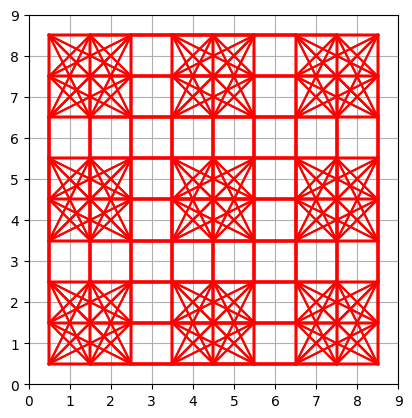

In [17]:
from collections import deque
import matplotlib.pyplot as plt

class SudokuCSP:
    def __init__(self, puzzle):
        self.puzzle = puzzle
        self.variables = [i for i in range(81)]  # Variables are the cells of the Sudoku grid
        self.domains = {var: list(range(1, 10)) if puzzle[var] == 0 else [puzzle[var]] for var in self.variables}
        self.constraints = self.get_constraints()
        self.neighbours = self.get_neighbours()
        self.arcs = self.get_arcs()

    def get_constraints(self):
        constraints = set()
        for var in self.variables:
            row = var // 9
            col = var % 9
            box_row = row // 3
            box_col = col // 3

            # Row constraints
            for i in range(9):
                if i != col:
                    constraints.add((var, row * 9 + i))

            # Column constraints
            for j in range(9):
                if j != row:
                    constraints.add((var, j * 9 + col))

            # 3x3 box constraints
            for i in range(box_row * 3, box_row * 3 + 3):
                for j in range(box_col * 3, box_col * 3 + 3):
                    if i != row and j != col:
                        constraints.add((var, i * 9 + j))

        return constraints

    def get_neighbours(self):
        neighbours = {var: set() for var in self.variables}
        for var1, var2 in self.constraints:
            neighbours[var1].add(var2)
            neighbours[var2].add(var1)
        return neighbours

    def get_arcs(self):
        arcs = set()
        for var in self.variables:
            row = var // 9
            col = var % 9
            box_row = row // 3
            box_col = col // 3

            # Row arcs
            for i in range(9):
                if i != col:
                    arcs.add((var, row * 9 + i))

            # Column arcs
            for j in range(9):
                if j != row:
                    arcs.add((var, j * 9 + col))

            # 3x3 box arcs
            for i in range(box_row * 3, box_row * 3 + 3):
                for j in range(box_col * 3, box_col * 3 + 3):
                    if i != row and j != col:
                        arcs.add((var, i * 9 + j))
                        
                        
        sorted_arcs = sorted(arcs, key = lambda arc: (arc[0] // 9, arc[0] % 9, arc[1] // 9, arc[1] % 9))
        for arc in sorted_arcs:
            row1, col1 = arc[0] // 9, arc[0] % 9
            row2, col2 = arc[1] // 9, arc[1] % 9
            print("(", row1, ",", col1, ")", "-->", "(", row2, ",", col2, ")")

        return arcs

    def constraint(self, x, y):
        return x != y  # Sudoku constraint: numbers should be different

    def solve(self):
        if not ac3(self):
            return None

        solution = [self.domains[var][0] for var in self.variables]
        return solution

def ac3(csp, queue=None):
    if queue is None:
        queue = deque(csp.arcs)

    while queue:
        (xi, xj) = queue.popleft()
        if revise(csp, xi, xj):
            if not csp.domains[xi]:
                return False
            for xk in csp.neighbours[xi]:
                if xk != xj:
                    queue.append((xk, xi))

    return True

def revise(csp, xi, xj):
    revised = False
    for x in csp.domains[xi][:]:
        if not any(csp.constraint(x, y) for y in csp.domains[xj]):
            csp.domains[xi].remove(x)
            revised = True
    return revised

def print_board(board):
    for i in range(9):
        row = board[i * 9: (i + 1) * 9]
        print(row)

def visualize_arcs(arcs):
    fig, ax = plt.subplots()

    for arc in arcs:
        row1, col1 = arc[0] // 9, arc[0] % 9
        row2, col2 = arc[1] // 9, arc[1] % 9
        ax.plot([col1 + 0.5, col2 + 0.5], [8.5 - row1, 8.5 - row2], color='red')

    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
    ax.grid(True)
    ax.set_aspect('equal')
    plt.show()
    
# Example usage
puzzle = [
    2, 0, 9, 0, 0, 0, 6, 0, 0,
    0, 4, 0, 8, 7, 0, 0, 1, 2,
    8, 0, 0, 0, 1, 9, 0, 4, 0,
    0, 3, 0, 7, 0, 0, 8, 0, 1,
    0, 6, 5, 0, 0, 8, 0, 3, 0,
    1, 0, 0, 0, 3, 0, 0, 0, 7,
    0, 0, 0, 6, 5, 0, 7, 0, 9,
    6, 0, 4, 0, 0, 0, 0, 2, 0,
    0, 8, 0, 3, 0, 1, 4, 5, 0,
]

csp = SudokuCSP(puzzle)
solution = csp.solve()

if solution is not None:
    print("Solution:")
    print_board(solution)
else:
    print("No solution exists.")

# Visualize the arcs
visualize_arcs(csp.arcs)